In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pprint import pprint
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib.legend_handler import HandlerLine2D
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_curve, auc, classification_report

In [39]:
train = pd.read_csv('F:\Know_I\DataAndAnalysis\\train.csv', engine='python')
test = pd.read_csv('F:\Know_I\DataAndAnalysis\\test.csv', engine='python') 
gender = pd.read_csv('F:\Know_I\DataAndAnalysis\\gender_submission.csv', engine='python')

In [40]:
#train = pd.concat([train, test], ignore_index = True, sort=False)
train.head()

#SibSp: Number of Siblings or Spouse
#Parch: Number of Parents or Children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [43]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [45]:
gender.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [46]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [47]:
train.isnull().any().sum()

3

In [48]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
train.isnull().sum().sum()

866

In [50]:
test.isnull().sum().sum()

414

In [51]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [52]:
train['Fare'].max()

512.3292

In [53]:
train['Fare'].mean()

32.204207968574636

In [54]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [55]:
train['Age'].isnull().sum()

177

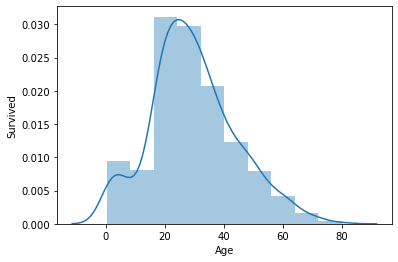

In [56]:
sns.distplot(train['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [57]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Age'].isnull().any()

False

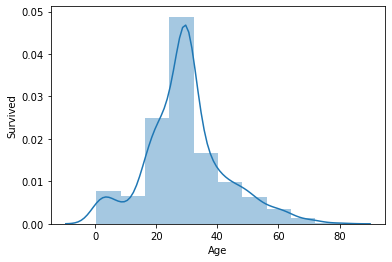

In [58]:
sns.distplot(train['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [59]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [60]:
test['Age'].isnull().any()

True

In [61]:
test['Age'].isnull().sum()

86

In [62]:
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [63]:
test['Age'].head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [64]:
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [65]:
train['Cabin'].fillna('NAN', inplace=True)

In [66]:
train['Cabin'].head()

0     NAN
1     C85
2     NAN
3    C123
4     NAN
Name: Cabin, dtype: object

In [67]:
train['Cabin'].unique() #cabin: heatmap

array(['NAN', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64

In [68]:
train['Cabin'].describe()
#since max number of available values is NAN, Cabin is removed. else, it could contribute to bias.

count     891
unique    148
top       NAN
freq      687
Name: Cabin, dtype: object

In [69]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [70]:
train['Embarked'].fillna("S", inplace=True)

In [71]:
train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [72]:
#encode Embarked
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [73]:
enc = OrdinalEncoder()

In [74]:
train_emb = np.array(train['Embarked']).reshape(-1,1)
test_emb = np.array(test['Embarked']).reshape(-1,1)
train['Embarked'] = enc.fit_transform(train_emb)
test['Embarked'] = enc.fit_transform(test_emb)

In [75]:
train['Embarked'].head()

0    2.0
1    0.0
2    2.0
3    2.0
4    2.0
Name: Embarked, dtype: float64

In [76]:
test['Embarked'].head()

0    1.0
1    2.0
2    1.0
3    2.0
4    2.0
Name: Embarked, dtype: float64

In [77]:
train['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [78]:
test['Sex'].head()

0      male
1    female
2      male
3      male
4    female
Name: Sex, dtype: object

In [79]:
train_sex = np.array(train['Sex']).reshape(-1,1)
test_sex = np.array(test['Sex']).reshape(-1,1)
train['Sex'] = enc.fit_transform(train_sex)
test['Sex'] = enc.fit_transform(test_sex)

In [80]:
train['Sex'].head()

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Sex, dtype: float64

In [81]:
test['Sex'].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Sex, dtype: float64

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NAN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NAN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NAN,2.0


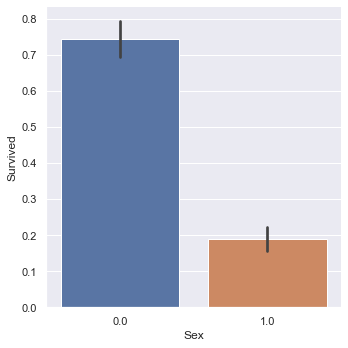

In [83]:
sns.set(color_codes=True)
sns.catplot(x='Sex', y='Survived', kind='bar', data=train)

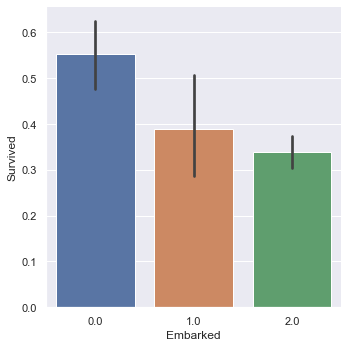

In [84]:
sns.catplot(x='Embarked',y='Survived',kind='bar', data=train)

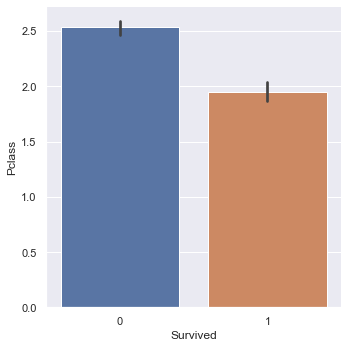

In [85]:
sns.catplot(x='Survived', y='Pclass',kind='bar', data=train)

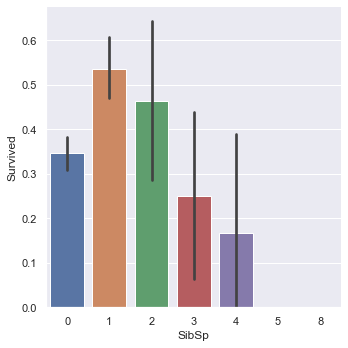

In [86]:
sns.catplot(x='SibSp',y='Survived', kind='bar', data=train)

In [87]:
train['SibSp'].head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [88]:
train['Family'] = train.loc[:,'SibSp']+train.loc[:,'Parch']
test['Family'] = test.loc[:,'SibSp']+test.loc[:,'Parch']

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NAN,2.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NAN,2.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,2.0,1
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NAN,2.0,0


In [90]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",1.0,34.5,0,0,330911,7.8292,NaN,1.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.0,1,0,363272,7.0000,NaN,2.0,1
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.0,0,0,240276,9.6875,NaN,1.0,0
3,895,3,"Wirz, Mr. Albert",1.0,27.0,0,0,315154,8.6625,NaN,2.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.0,1,1,3101298,12.2875,NaN,2.0,2


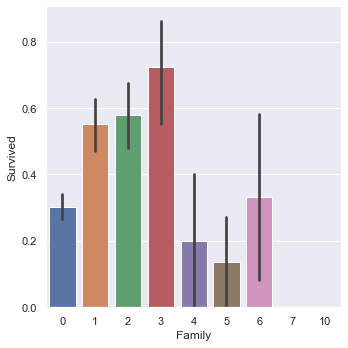

In [91]:
sns.catplot(x='Family',y='Survived', kind='bar', data=train)

In [92]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [93]:
def name_title(str):
    result = re.findall('[A-Za-z]+\.', str) #result is a list
    if result:
        return result[0] #iff result is present, returns value at index 0
    else:
        return None

train['Name_Title'] = train['Name'].apply(name_title)
test['Name_Title'] = test['Name'].apply(name_title)
#apply is a pandas function that applies the function for the entire dataframe column

In [94]:
train['Name_Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [95]:
test['Name_Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Col.', 'Rev.', 'Dr.',
       'Dona.'], dtype=object)

In [96]:
train['Name_Title'].isnull().any()

False

In [97]:
train['Name_Title'].describe()

count     891
unique     17
top       Mr.
freq      517
Name: Name_Title, dtype: object

In [98]:
train['Name_Title'] = train['Name_Title'].replace('Miss.', 'Ms.')
train['Name_Title'] = train['Name_Title'].replace('Mlle.', 'Ms.')
train['Name_Title'] = train['Name_Title'].replace('Mme.', 'Mrs.')
test['Name_Title'] = test['Name_Title'].replace('Miss.', 'Ms.')
test['Name_Title'] = test['Name_Title'].replace('Mlle.', 'Ms.')
test['Name_Title'] = test['Name_Title'].replace('Mme.', 'Mrs.')

In [99]:
train['Name_Title'].unique()

array(['Mr.', 'Mrs.', 'Ms.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Major.',
       'Lady.', 'Sir.', 'Col.', 'Capt.', 'Countess.', 'Jonkheer.'],
      dtype=object)

In [100]:
test['Name_Title'].unique()

array(['Mr.', 'Mrs.', 'Ms.', 'Master.', 'Col.', 'Rev.', 'Dr.', 'Dona.'],
      dtype=object)

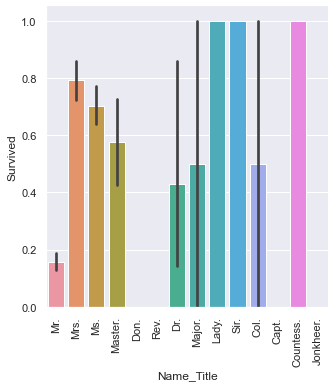

In [101]:
graph = sns.catplot(x='Name_Title',y='Survived', kind='bar', data=train)
graph.set_xticklabels(rotation=90)

In [102]:
name_title_train = np.array(train['Name_Title']).reshape(-1, 1)
name_title_test = np.array(test['Name_Title']).reshape(-1, 1)
train['Name_Title'] = enc.fit_transform(name_title_train)
test['Name_Title'] = enc.fit_transform(name_title_test)

In [103]:
train['Name_Title'].unique()

array([ 9., 10., 11.,  8.,  3., 12.,  4.,  7.,  6., 13.,  1.,  0.,  2.,
        5.])

In [104]:
test['Name_Title'].unique()

array([4., 5., 6., 3., 0., 7., 2., 1.])

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    float64
 12  Family       891 non-null    int64  
 13  Name_Title   891 non-null    float64
dtypes: float64(5), int64(6), object(3)
memory usage: 97.6+ KB


In [106]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NAN,2.0,1,9.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0,1,10.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NAN,2.0,0,11.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,2.0,1,10.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NAN,2.0,0,9.0


In [107]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Name_Title
0,892,3,"Kelly, Mr. James",1.0,34.5,0,0,330911,7.8292,NaN,1.0,0,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.0,1,0,363272,7.0000,NaN,2.0,1,5.0
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.0,0,0,240276,9.6875,NaN,1.0,0,4.0
3,895,3,"Wirz, Mr. Albert",1.0,27.0,0,0,315154,8.6625,NaN,2.0,0,4.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.0,1,1,3101298,12.2875,NaN,2.0,2,5.0


In [108]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
Family         False
Name_Title     False
dtype: bool

In [109]:
test.isnull().sum().sum()

328

In [110]:
tr_col = list(train.columns.values)
ind = tr_col.index('Survived')
tr_col.pop(ind)
train = train[tr_col+['Survived']]
print(train.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Name_Title',
       'Survived'],
      dtype='object')


In [111]:
train.drop(['Cabin', 'Name', 'PassengerId', 'Fare', 'Ticket', 'Name_Title', 'SibSp', 'Parch'], inplace=True, axis=1) 
test.drop(['Cabin', 'Name', 'PassengerId', 'Fare', 'Ticket', 'Name_Title', 'SibSp', 'Parch'], inplace=True, axis=1) 
#inplace says if dataframe is true
# axis takes int or string value for rows/columns. Input can be 0 or 1 for Integer and ‘index’ or ‘columns’ for String

C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\pandas\core\frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


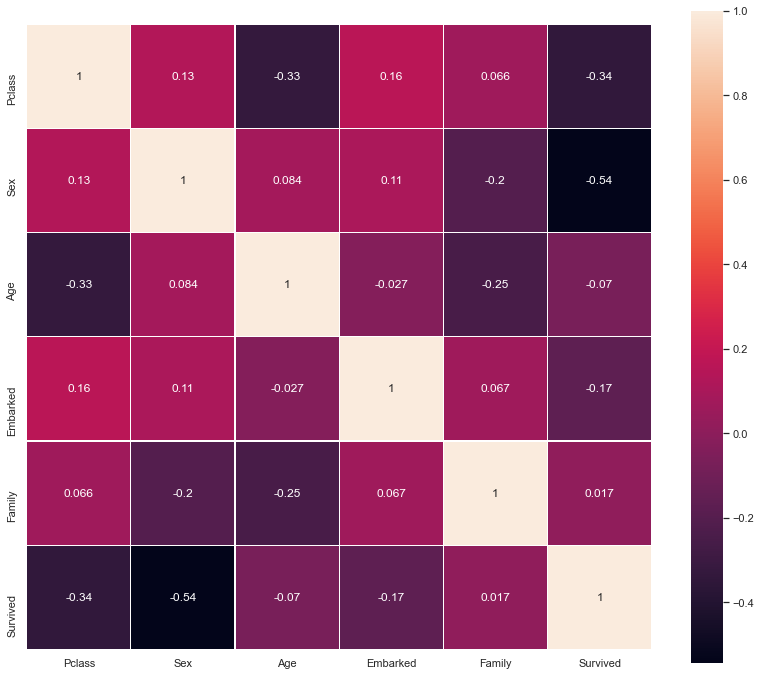

In [112]:
plt.figure(figsize=(14,12))
sns.heatmap(train.astype(float).corr(),linewidths=0.1, square=True,  linecolor='white', annot=True)
plt.show()

In [113]:
train.shape

(891, 6)

In [114]:
print(train.columns)
print(test.columns)
#To verify if the order of selected columns in both train and test are the same

Index(['Pclass', 'Sex', 'Age', 'Embarked', 'Family', 'Survived'], dtype='object')
Index(['Pclass', 'Sex', 'Age', 'Embarked', 'Family'], dtype='object')


In [115]:
X_train , y_train = train.values[:,:-1], train.values[:,-1]

#values returns values of the dataframe as a numpy aray

In [116]:
X_train.shape

(891, 5)

In [117]:
y_train.shape

(891,)

In [118]:
X_test, y_test = test.values[:,:], gender.values[:,-1]

In [119]:
X_test.shape

(418, 5)

In [120]:
y_test.shape

(418,)

In [121]:
random = RandomForestClassifier(random_state=1)
random.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [122]:
random.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [123]:
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}

In [124]:
GridSearchCV(cv=5, error_score='raise', estimator=random, iid=True, n_jobs=1,
             param_grid=param_grid, pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=1), iid=True,
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             return_train_score='warn')

In [125]:
#On each iteration, the algorithm will choose a difference combination of the features.
#Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings!
#However, the benefit of a random search is that we are not trying every combination,
#but selecting at random to sample a wide range of values.

In [126]:
random.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [127]:
random.score(X_test, y_test)

0.8086124401913876

In [128]:
y_pred = random.predict(X_test)
y_pred

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [129]:
errors = abs(y_pred - y_test)
errors

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [130]:
mae =  mean_squared_error(y_test, y_pred, squared = True) 
mae 

0.19138755980861244

In [131]:
rmse =  mean_squared_error(y_test, y_pred, squared = False)
rmse

0.4374786392598071

In [132]:
cf_matrix = confusion_matrix(y_test, y_pred)  
cf_matrix

array([[227,  39],
       [ 41, 111]], dtype=int64)

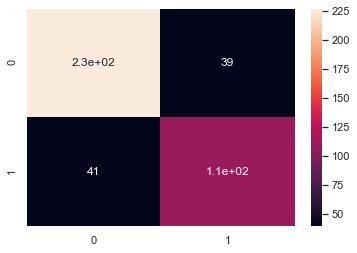

In [133]:
sns.heatmap(cf_matrix, annot=True)

In [134]:
report = classification_report(y_test, y_pred)
print('Report: \n',report)

Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       266
           1       0.74      0.73      0.74       152

    accuracy                           0.81       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.81      0.81      0.81       418



In [135]:
random_fpr, random_tpr, random_threshold = roc_curve(y_test, y_pred)
random_roc_auc = auc(random_fpr, random_tpr)
random_roc_auc

0.7918233082706766

In [136]:
random_grid= GridSearchCV(estimator=random, param_grid=param_grid, cv= 5)
random_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [137]:
random_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

In [138]:
random_grid.score(X_test, y_test)

0.9449760765550239

In [139]:
y_pred = random_grid.predict(X_test)
y_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [140]:
errors = abs(y_pred - y_test)
errors

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [141]:
mae =  mean_squared_error(y_test, y_pred, squared = True) 
mae 

0.05502392344497608

In [142]:
rmse =  mean_squared_error(y_test, y_pred, squared = False)
rmse

0.2345717874020149

In [143]:
cf_matrix = confusion_matrix(y_test, y_pred)  
cf_matrix

array([[257,   9],
       [ 14, 138]], dtype=int64)

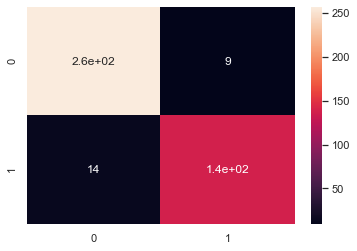

In [144]:
sns.heatmap(cf_matrix, annot=True)

In [145]:
report = classification_report(y_test, y_pred)
print('Report: \n',report)

Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       266
           1       0.94      0.91      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [146]:
grid_fpr, grid_tpr, grid_threshold = roc_curve(y_test, y_pred)
grid_roc_auc = auc(grid_fpr, grid_tpr)
grid_roc_auc

0.93703007518797

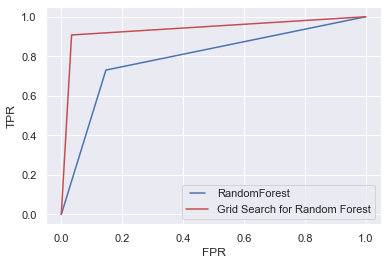

In [147]:
#to compare auc scores of random forest and RandomGrid
line1 = plt.plot(random_fpr, random_tpr, 'b', label='RandomForest')
line2 = plt.plot(grid_fpr, grid_tpr, 'r', label='Grid Search for Random Forest')
plt.legend(handler_map= {line1[0]: HandlerLine2D(numpoints=2)})
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [148]:
logistic = LogisticRegression(random_state=1)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [149]:
logistic.score(X_test, y_test)

0.9401913875598086

In [150]:
y_pred = logistic.predict(X_test)
y_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [151]:
# calculate error: |predicted values - actual values| 
errors = abs(y_pred - y_test)
errors

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [152]:
mae =  mean_squared_error(y_test, y_pred, squared = True) 
mae

0.05980861244019139

In [153]:
rmse =  mean_squared_error(y_test, y_pred, squared = False)
rmse

0.24455799402225925

In [154]:
cf_matrix = confusion_matrix(y_test, y_pred)  
cf_matrix

array([[252,  14],
       [ 11, 141]], dtype=int64)

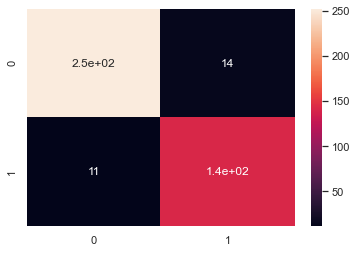

In [155]:
sns.heatmap(cf_matrix, annot=True)

In [156]:
report = classification_report(y_test, y_pred)
print('Report: \n',report)

Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [157]:
logistic_fpr, logistic_tpr, logistic_threshold = roc_curve(y_test, y_pred)
logistic_roc_auc = auc(logistic_fpr, logistic_tpr)
logistic_roc_auc

0.9375000000000001

In [170]:
logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [175]:
param_grid = [{'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20), 'solver' : ['liblinear']}]

In [176]:
logistic_grid= GridSearchCV(estimator=logistic, param_grid=param_grid, cv= 5)
logistic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}])

In [177]:
logistic_grid.score(X_test, y_test)

0.9856459330143541

In [180]:
logistic_grid.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [181]:
y_pred = logistic_grid.predict(X_test)
print(y_pred)

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.

In [182]:
errors = abs(y_pred - y_test)
errors

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [183]:
mae =  mean_squared_error(y_test, y_pred, squared = True) 
print(mae) 

0.014354066985645933


In [184]:
rmse =  mean_squared_error(y_test, y_pred, squared = False)
print(rmse)

0.11980845957463077


In [185]:
cf_matrix = confusion_matrix(y_test, y_pred)  
print(cf_matrix)

[[266   0]
 [  6 146]]


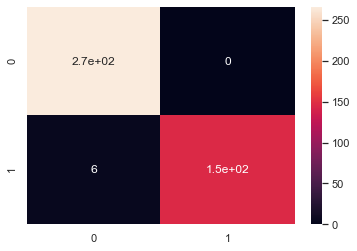

In [186]:
sns.heatmap(cf_matrix, annot=True)

In [187]:
report = classification_report(y_test, y_pred)
print('Report: \n',report)

Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       266
           1       1.00      0.96      0.98       152

    accuracy                           0.99       418
   macro avg       0.99      0.98      0.98       418
weighted avg       0.99      0.99      0.99       418



In [189]:
grid_fpr, grid_tpr, grid_threshold = roc_curve(y_test, y_pred)
grid_roc_auc = auc(grid_fpr, grid_tpr)
grid_roc_auc

0.9802631578947368

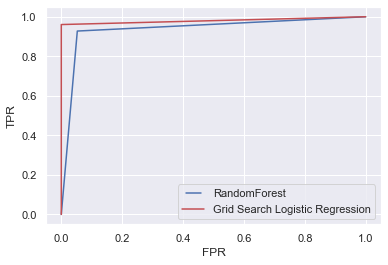

In [190]:
line1 = plt.plot(logistic_fpr, logistic_tpr, 'b', label='RandomForest')
line2 = plt.plot(grid_fpr, grid_tpr, 'r', label='Grid Search Logistic Regression')
plt.legend(handler_map= {line1[0]: HandlerLine2D(numpoints=2)})
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [188]:
naive =  GaussianNB()

In [159]:
naive.fit(X_train, y_train)

GaussianNB()

In [160]:
naive.score(X_test, y_test) 

0.9210526315789473

In [161]:
y_pred = naive.predict(X_test)
print(y_pred)

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.

In [ ]:
errors = abs(y_pred - y_test)
errors

In [162]:
mae =  mean_squared_error(y_test, y_pred, squared = True) 
print(mae) 

0.07894736842105263


In [163]:
rmse =  mean_squared_error(y_test, y_pred, squared = False)
print(rmse)

0.28097574347450816


In [164]:
cf_matrix = confusion_matrix(y_test, y_pred)  
print(cf_matrix)

[[239  27]
 [  6 146]]


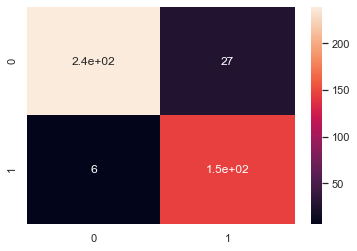

In [165]:
sns.heatmap(cf_matrix, annot=True)

In [166]:
report = classification_report(y_test, y_pred)
print('Report: \n',report)

Report: 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       266
           1       0.84      0.96      0.90       152

    accuracy                           0.92       418
   macro avg       0.91      0.93      0.92       418
weighted avg       0.93      0.92      0.92       418



In [167]:
naive_fpr, naive_tpr, naive_threshold = roc_curve(y_test, y_pred)
naive_roc_auc = auc(naive_fpr, naive_tpr)
naive_roc_auc

0.9295112781954887

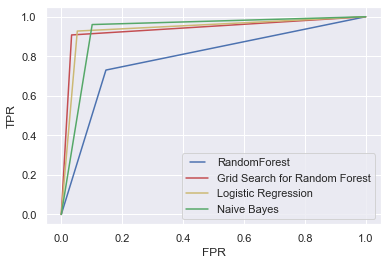

In [168]:
line1 = plt.plot(random_fpr, random_tpr, 'b', label='RandomForest')
line2 = plt.plot(grid_fpr, grid_tpr, 'r', label='Grid Search for Random Forest')
line3 = plt.plot(logistic_fpr, logistic_tpr, 'y', label='Logistic Regression')
line4 = plt.plot(naive_fpr, naive_tpr, 'g', label='Naive Bayes')
plt.legend(handler_map= {line1[0]: HandlerLine2D(numpoints=2)})
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()